# Bitcoin Price  Prediction- Widhya project 1


In [41]:
#importing packages and class
import pandas
import numpy
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
#Uploading the csv file
File="https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv"
data=pandas.read_csv(File)

In [43]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [44]:
data.tail()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09
2905,1/31/2018,10125.01333,16837687.5,1.700000e+11,9.332398e+08,154444.5903,1.042831,0,1745.948718,15.675,...,1.016284,80.529148,481100,204276,296688784,197264,141543,1785708.486,159867.3306,1.618659e+09


In [45]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [47]:
#Calculating number of rows
print(len(data))

2906


In [48]:
#Calculating number of columns
print(len(data.columns))

24


In [49]:
#Value of 1024th row at column btc_market_price
print(data.loc[1023,'btc_market_price'])

13.6888


In [50]:
#Calculating the Nan value
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [51]:
#Calculating the corelation
corelation=data.corr()

In [52]:
print(corelation)

                                                    btc_market_price  \
btc_market_price                                            1.000000   
btc_total_bitcoins                                          0.392474   
btc_market_cap                                              0.999783   
btc_trade_volume                                            0.868813   
btc_blocks_size                                             0.674507   
btc_avg_block_size                                          0.544033   
btc_n_orphaned_blocks                                      -0.076400   
btc_n_transactions_per_block                                0.544125   
btc_median_confirmation_time                                0.275250   
btc_hash_rate                                               0.920876   
btc_difficulty                                              0.916937   
btc_miners_revenue                                          0.986732   
btc_transaction_fees                                        0.80

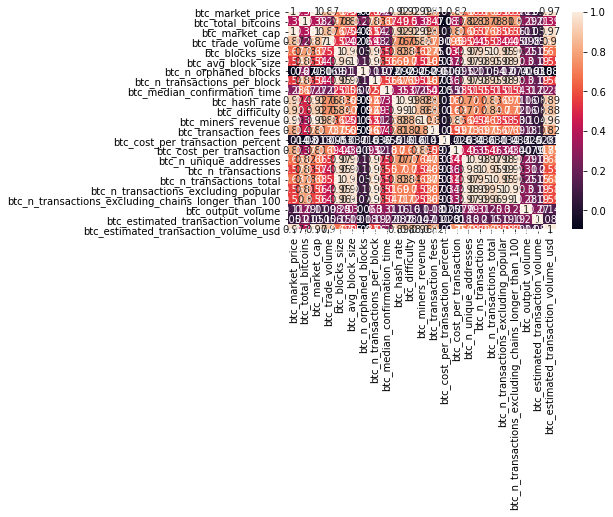

In [53]:
#Heat map 
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

In [54]:
#Filling the Nan value with mean
data=data.fillna(data.mean())

In [55]:
#checking the Nan value is filled
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [35]:
Y=data['btc_market_price']
X=data[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']]

In [56]:
#Performing Train Test Split method on the data
train_X,val_X,train_Y,val_Y=train_test_split(X,Y,test_size=0.2, random_state=0)

In [57]:
#Performing Linear Regression on the model and Fitting the model
linear_Regression=LinearRegression()
linear_Regression=linear_Regression.fit(train_X,train_Y)

In [58]:
#Predecting  the model
predict=linear_Regression.predict(val_X)
print("The predictions are")
print(predict)

The predictions are
[ 1.52040314e+01  2.72287268e+02  1.09036534e+02  4.63951981e+02
  3.92542160e+00  4.79859114e+01  1.89526764e+00  2.48643856e+03
  7.95899962e+02  1.15184031e+01  9.73413735e+00 -3.98656496e+00
  5.46332891e+03  6.28569216e+00 -7.20739638e+00  1.22185979e+01
  2.43493788e+01  3.00537191e+02  8.84775968e+02  7.31568506e+01
 -1.30593175e+01  8.24754204e+01  2.60347670e+02  8.09642507e-01
 -3.24074644e-01 -1.30589823e+01  7.62635876e+00  8.82230501e+00
  6.46407683e+02 -8.10697159e+00  1.14275938e+01  1.15651849e+01
  4.75901435e+01  7.25390439e+00  2.44366507e+02  1.05406890e+03
  4.15822667e+02  4.35386079e+02  2.46131828e+02  1.14942657e+02
  6.02473201e+02  1.24162913e+02  1.58911615e+01  5.35712015e+02
  2.23704637e+01  6.48776586e+02  3.22808447e+02  2.81518331e+02
  3.51875357e+00  5.21607170e+02 -1.30474660e+01  4.57777528e+03
  1.71905270e+04  4.12537398e+01  6.02636495e+00  6.23365151e+02
  3.64536587e+01  1.52660477e+04  1.27153828e+01  1.14472730e+02
  7.9

In [59]:
#Calculating the Mean Absolute Error and Mean Square Error
MAE=mean_absolute_error(val_Y,predict)
MSE=mean_squared_error(val_Y,predict)
print(MAE)
print(MSE)

13.303542920678288
439.05559089186596
